In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import openpyxl

ETL de las bases para el estudio del KPI

In [2]:
macro = pd.read_csv('Annual_Macroeconomic_Factors.csv')
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    47 non-null     object 
 1   House_Price_Index       47 non-null     float64
 2   Stock_Price_Index       47 non-null     float64
 3   Consumer_Price_Index    47 non-null     float64
 4   Population              47 non-null     float64
 5   Unemployment_Rate       47 non-null     float64
 6   Real_GDP                47 non-null     float64
 7   Mortgage_Rate           47 non-null     float64
 8   Real_Disposable_Income  47 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.4+ KB


In [3]:
#eliminamos duplicados
macro[macro.duplicated()]
macro.drop_duplicates(inplace = True)

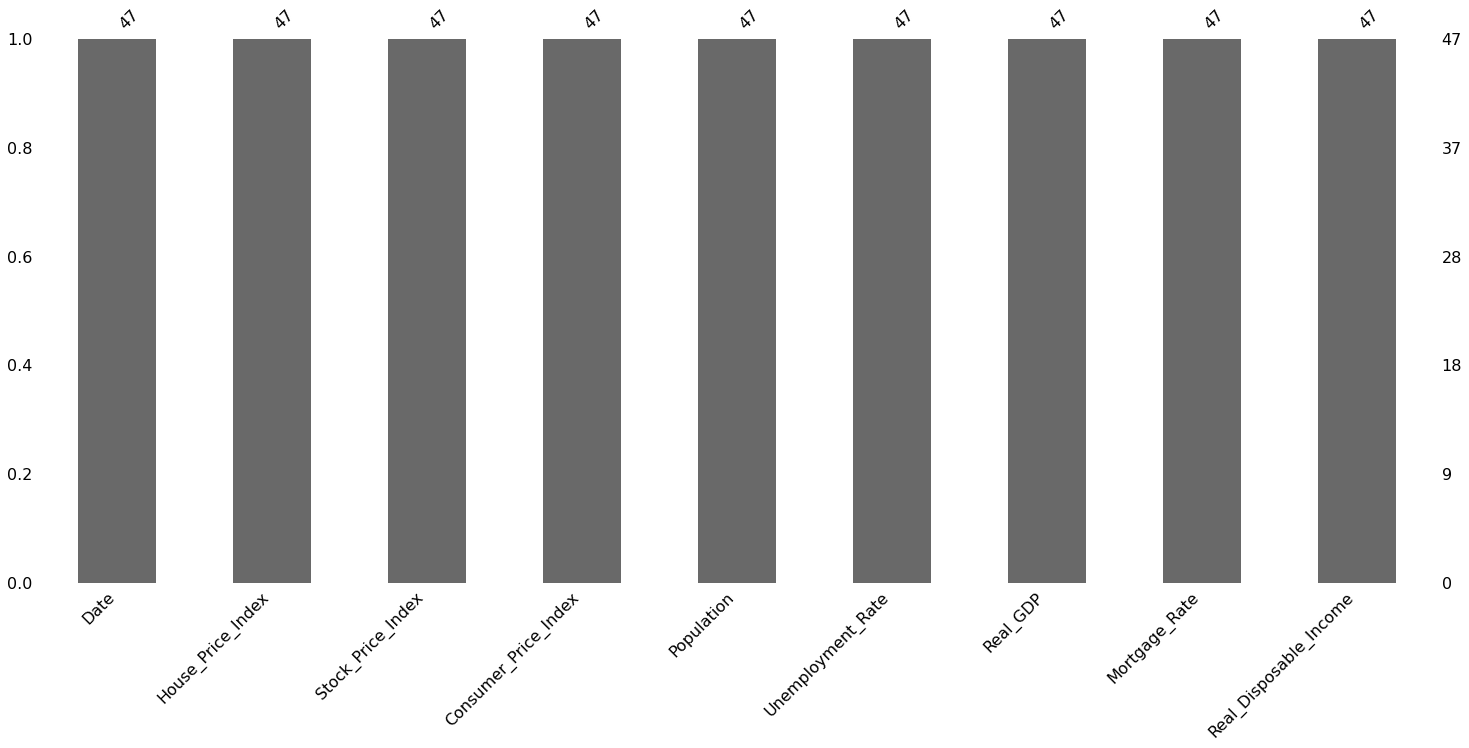

In [4]:
msno.bar(macro)
plt.show()

Evidenciamos que no hay datos faltantes

In [5]:
print('Porcentaje de valores faltantes de la variable Date:', (macro.Date.isnull().sum()/len(macro))*100)
print('Porcentaje de valores faltantes de la variable House Price Index:', (macro.House_Price_Index.isnull().sum()/len(macro))*100)


Porcentaje de valores faltantes de la variable Date: 0.0
Porcentaje de valores faltantes de la variable House Price Index: 0.0


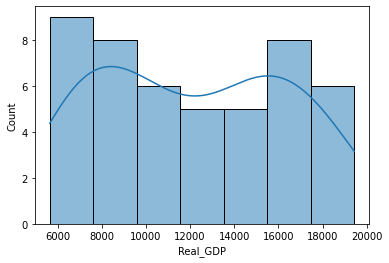

In [6]:
#distribucion
sns.histplot(x = 'Real_GDP', data= macro, kde = True)
plt.show()

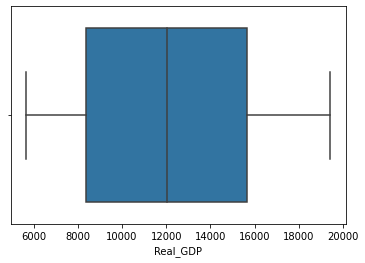

In [7]:
#valores atipicos
sns.boxplot(x = 'Real_GDP', data = macro)
plt.show()

Revisamos correlaciones para saber con cuales variables es mejor el analisis

In [8]:
# Matriz de correlación
corr_matrix = macro.corr(method='pearson')
corr_matrix

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
House_Price_Index,1.000000,0.969546,0.969244,-0.615552,-0.339527,0.980220,-0.834767,0.986553
Stock_Price_Index,0.969546,1.000000,0.950569,-0.656950,-0.393546,0.971103,-0.842434,0.973682
Consumer_Price_Index,0.969244,0.950569,1.000000,-0.551374,-0.306713,0.991167,-0.852521,0.988868
Population,-0.615552,-0.656950,-0.551374,1.000000,0.067934,-0.587978,0.422529,-0.596869
Unemployment_Rate,-0.339527,-0.393546,-0.306713,0.067934,1.000000,-0.354710,0.316395,-0.335303
Real_GDP,0.980220,0.971103,0.991167,-0.587978,-0.354710,1.000000,-0.878215,0.995385
Mortgage_Rate,-0.834767,-0.842434,-0.852521,0.422529,0.316395,-0.878215,1.000000,-0.873526
Real_Disposable_Income,0.986553,0.973682,0.988868,-0.596869,-0.335303,0.995385,-0.873526,1.000000


In [9]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


In [10]:
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
61,Real_Disposable_Income,Real_GDP,0.995385,0.995385
47,Real_GDP,Real_Disposable_Income,0.995385,0.995385
42,Real_GDP,Consumer_Price_Index,0.991167,0.991167
21,Consumer_Price_Index,Real_GDP,0.991167,0.991167
58,Real_Disposable_Income,Consumer_Price_Index,0.988868,0.988868
23,Consumer_Price_Index,Real_Disposable_Income,0.988868,0.988868
7,House_Price_Index,Real_Disposable_Income,0.986553,0.986553
56,Real_Disposable_Income,House_Price_Index,0.986553,0.986553
40,Real_GDP,House_Price_Index,0.980220,0.980220
5,House_Price_Index,Real_GDP,0.980220,0.980220


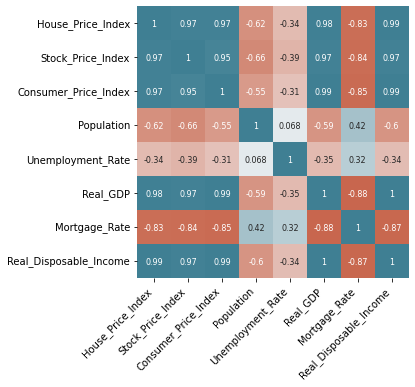

In [11]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Text(0, 0.5, 'PIB')

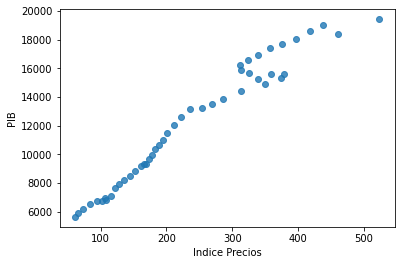

In [12]:
#Identificamos correlaciones Indice de precios - PIB (correlacion positiva)
# Gráfico
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=macro.House_Price_Index, y=macro.Real_GDP, alpha= 0.8)
ax.set_xlabel('Indice Precios')
ax.set_ylabel('PIB')

Text(0, 0.5, 'TD')

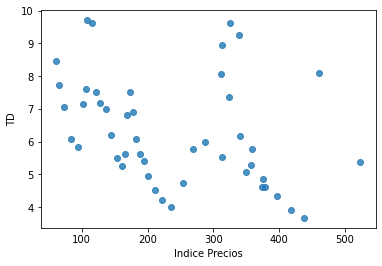

In [13]:
#Identificamos correlaciones Indice de precios - PIB (correlacion positiva)
# Gráfico
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=macro.House_Price_Index, y=macro.Unemployment_Rate, alpha= 0.8)
ax.set_xlabel('Indice Precios')
ax.set_ylabel('TD')

Se evidencia que la variable indice de precios de vivienda tiene correlacion con todas las variables, baja con tasa de desempleo

ETL Housing Macro

In [15]:
macroh = pd.read_csv('Housing_Macroeconomic_Factors_US (2).csv')
macroh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               425 non-null    object 
 1   house_price_index  425 non-null    float64
 2   population         425 non-null    int64  
 3   house_supply       425 non-null    float64
 4   gdp                422 non-null    float64
 5   mortgage_rate      422 non-null    float64
 6   employment_rate    422 non-null    float64
 7   permit_new         422 non-null    float64
 8   ppi_res            422 non-null    float64
 9   m3                 422 non-null    float64
 10  cci                422 non-null    float64
 11  delinquency_rate   374 non-null    float64
 12  hcai               285 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 43.3+ KB


In [16]:
#eliminamos duplicados
macroh[macroh.duplicated()]
macroh.drop_duplicates(inplace = True)

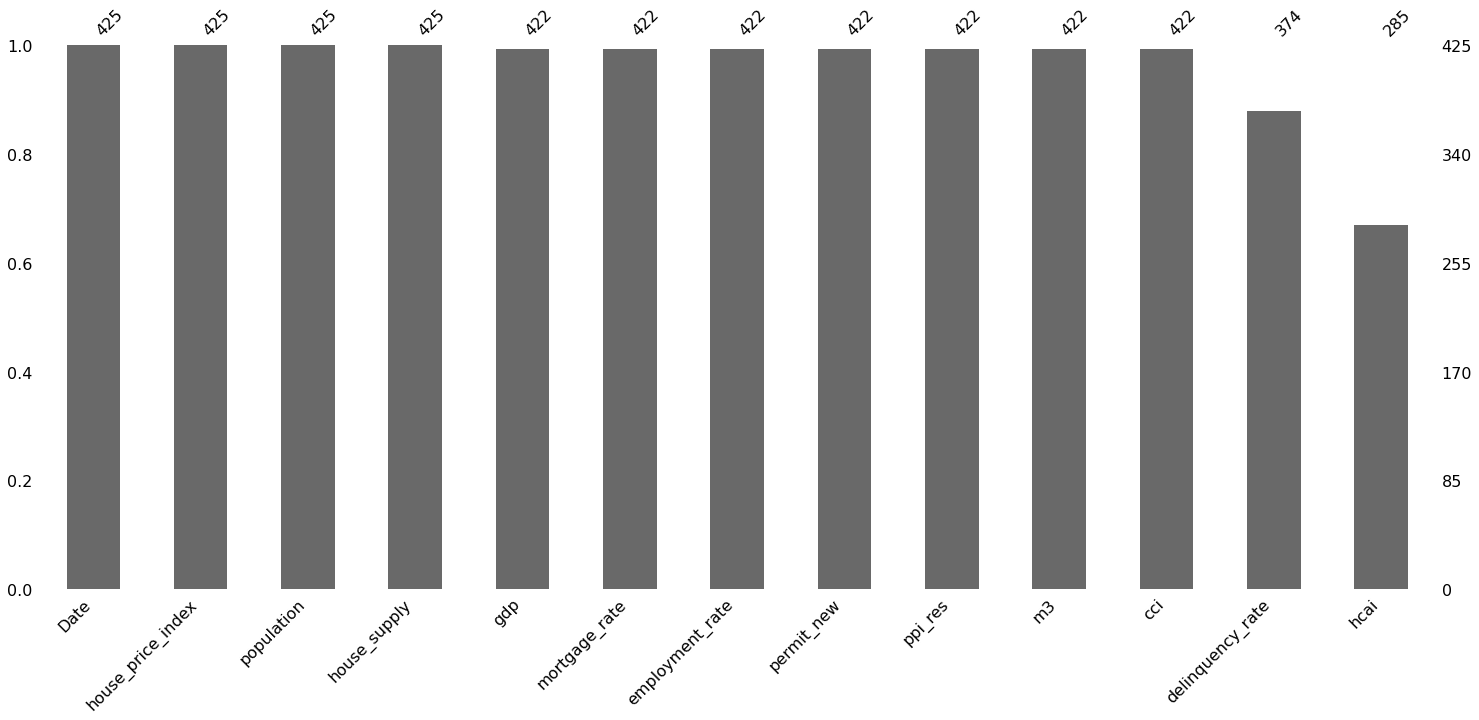

In [17]:
#evidenciamos datos faltantes
msno.bar(macroh)
plt.show()

In [18]:
#analizamos columnas con faltantes
print('Porcentaje de valores faltantes de la variable delincuencia tasa:', (macroh.delinquency_rate.isnull().sum()/len(macroh)) * 100)
print('Porcentaje de valores faltantes de la variable delincuencia tasa:', (macroh.hcai.isnull().sum()/len(macroh)) * 100)

Porcentaje de valores faltantes de la variable delincuencia tasa: 12.0
Porcentaje de valores faltantes de la variable delincuencia tasa: 32.94117647058823


In [19]:
macroh

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.000,2.7439,100.46240,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.400,2.7475,100.49450,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.700,2.7537,100.57200,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.100,2.7677,100.65680,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.300,2.7729,100.69190,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2022-01-01,284.767,332684,5.7,100.091744,3.4450,70.748899,1841.0,294.807,21.6593,97.49467,2.13,NaN
421,2022-02-01,290.371,332750,6.0,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,2.13,NaN
422,2022-03-01,296.496,332812,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,2022-04-01,301.704,332863,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


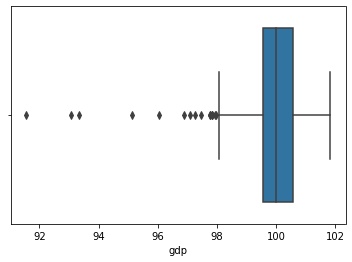

In [20]:
#valores atipicos
sns.boxplot(x = 'gdp', data = macroh)
plt.show()

In [21]:
#Revisamos correlacion
# Matriz de correlación
corr_matrix2 = macroh.corr(method='pearson')
corr_matrix2

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
house_price_index,1.000000,0.912175,0.041415,-0.112553,-0.848607,-0.453122,0.085709,0.924660,0.925596,-0.211095,0.108493,-0.446426
population,0.912175,1.000000,-0.051396,-0.168237,-0.959801,-0.568996,-0.125090,0.961313,0.904646,-0.198640,0.396674,-0.812660
house_supply,0.041415,-0.051396,1.000000,0.108612,0.171008,-0.179993,-0.563854,0.014229,-0.049533,-0.547115,0.340315,-0.270590
gdp,-0.112553,-0.168237,0.108612,1.000000,0.278715,0.514897,0.181109,-0.141507,-0.245704,0.369948,-0.137557,0.236192
mortgage_rate,-0.848607,-0.959801,0.171008,0.278715,1.000000,0.629674,0.140572,-0.921363,-0.864389,0.252450,-0.473523,0.791513
employment_rate,-0.453122,-0.568996,-0.179993,0.514897,0.629674,1.000000,0.581210,-0.594075,-0.568585,0.641881,-0.784864,0.649549
permit_new,0.085709,-0.125090,-0.563854,0.181109,0.140572,0.581210,1.000000,-0.181666,-0.081149,0.573992,-0.808944,0.714809
ppi_res,0.924660,0.961313,0.014229,-0.141507,-0.921363,-0.594075,-0.181666,1.000000,0.956496,-0.270802,0.402560,-0.827442
m3,0.925596,0.904646,-0.049533,-0.245704,-0.864389,-0.568585,-0.081149,0.956496,1.000000,-0.213439,0.233534,-0.755793
cci,-0.211095,-0.198640,-0.547115,0.369948,0.252450,0.641881,0.573992,-0.270802,-0.213439,1.000000,-0.589727,0.311164


In [22]:
tidy_corr_matrix(corr_matrix2).head(10)

,variable_1,variable_2,r,abs_r
85,ppi_res,population,0.961313,0.961313
19,population,ppi_res,0.961313,0.961313
16,population,mortgage_rate,-0.959801,0.959801
49,mortgage_rate,population,-0.959801,0.959801
103,m3,ppi_res,0.956496,0.956496
92,ppi_res,m3,0.956496,0.956496
8,house_price_index,m3,0.925596,0.925596
96,m3,house_price_index,0.925596,0.925596
84,ppi_res,house_price_index,0.924660,0.924660
7,house_price_index,ppi_res,0.924660,0.924660


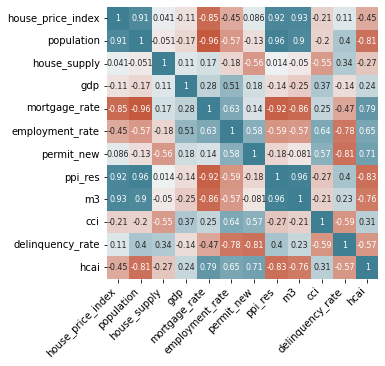

In [23]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix2,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Eliminamos las variables con baja correlacion con house price index como house_supply, permit_new

In [24]:
macroh.drop(columns = ['house_supply','permit_new'], inplace = True)
macroh

,Date,house_price_index,population,gdp,mortgage_rate,employment_rate,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,99.902813,9.2040,70.163085,100.000,2.7439,100.46240,NaN,NaN
1,1987-02-01,64.424,242005,99.875864,9.0825,70.289205,100.400,2.7475,100.49450,NaN,NaN
2,1987-03-01,64.735,242166,99.869734,9.0350,70.321678,100.700,2.7537,100.57200,NaN,NaN
3,1987-04-01,65.132,242338,99.882087,9.8325,70.499062,101.100,2.7677,100.65680,NaN,NaN
4,1987-05-01,65.565,242516,99.910371,10.5960,70.808308,101.300,2.7729,100.69190,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
420,2022-01-01,284.767,332684,100.091744,3.4450,70.748899,294.807,21.6593,97.49467,2.13,NaN
421,2022-02-01,290.371,332750,100.034014,3.7625,70.890307,303.546,21.7497,97.18996,2.13,NaN
422,2022-03-01,296.496,332812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,2022-04-01,301.704,332863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


imputamos valores faltantes

In [25]:
from sklearn.impute import SimpleImputer

# Definimos, en strategy, la estrategia que usaremos para la imputación. En este caso, utilizamos una medida de tendencia central.
# Más específicamente, la media

imputer = SimpleImputer(strategy = 'mean')

In [26]:
#imputamos valores en variable delinquency
imputer.fit(macroh[['delinquency_rate']])

macroh['delinquency_rate'] = imputer.transform(macroh[['delinquency_rate']])

In [27]:
print('Porcentaje de valores faltantes de la variable delincuencia tasa:', (macroh.delinquency_rate.isnull().sum()/len(macroh)) * 100)

Porcentaje de valores faltantes de la variable delincuencia tasa: 0.0


In [28]:
#imputamos valores en variable hcai
imputer.fit(macroh[['hcai']])

macroh['hcai'] = imputer.transform(macroh[['hcai']])

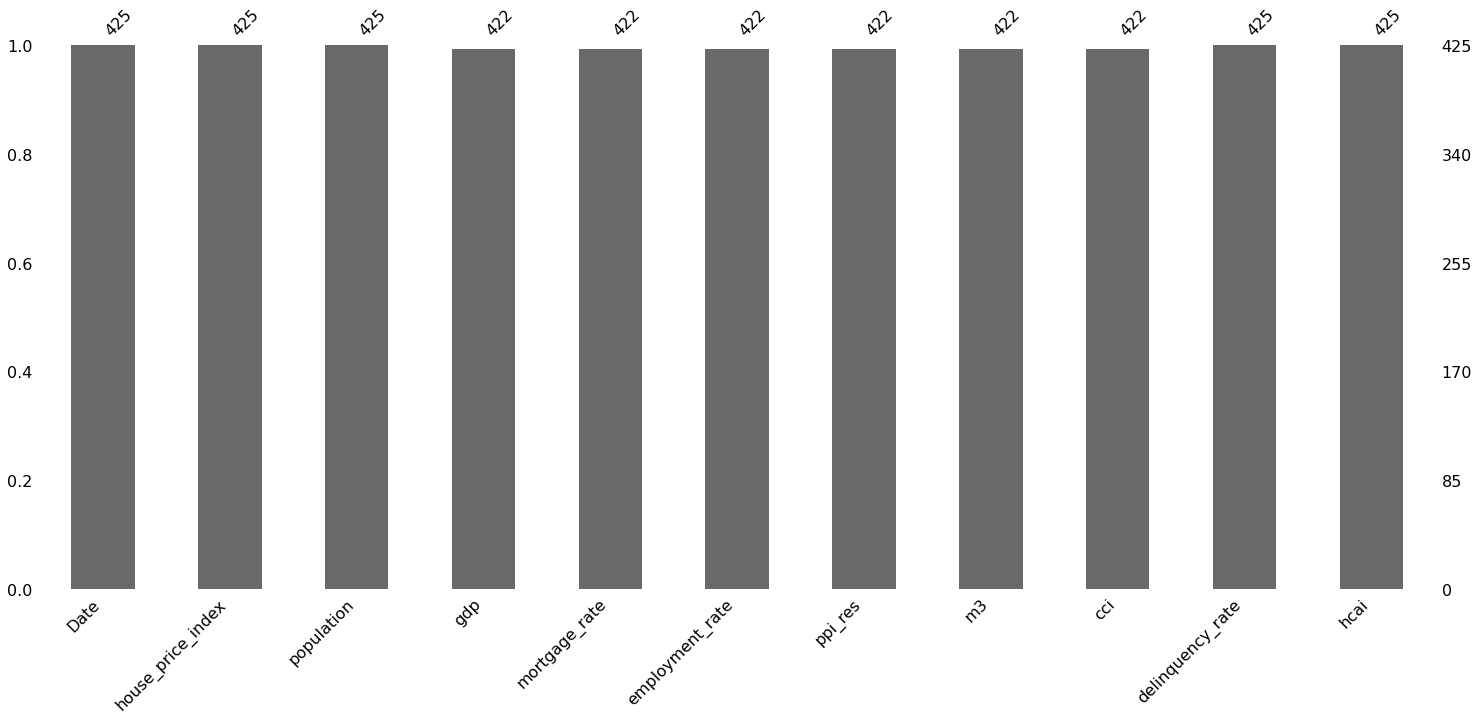

In [29]:
#evidenciamos datos faltantes
msno.bar(macroh)
plt.show()

Hasta el momento hemos hecho el ETL y tenemos dos bases listas
- macroh = Housing macroeconomic factors
- macro = annual macroeconomic factors 
- renta = Info_propiedades_precio_renta_roi
- PIB = PIB_estados

In [32]:
renta = pd.read_csv('Info_propiedades_precio_renta_roi.csv')
renta

,region,date,price,rent,property_type,roi
0,California,2010-02,231512.0,NaN,1Bedroom,NaN
1,California,2010-03,230640.0,NaN,1Bedroom,NaN
2,California,2010-04,230508.0,NaN,1Bedroom,NaN
3,California,2010-05,230649.0,NaN,1Bedroom,NaN
4,California,2010-06,229228.0,NaN,1Bedroom,NaN
...,...,...,...,...,...,...
38908,Wyoming,2019-08,248786.0,1275.0,Sfr,195.126275
38909,Wyoming,2019-09,250004.0,1250.0,Sfr,200.003200
38910,Wyoming,2019-10,251161.0,1197.5,Sfr,209.737787
38911,Wyoming,2019-11,252114.0,1200.0,Sfr,210.095000


Miramos proporcion de nulos

In [33]:
#eliminamos duplicados
renta[renta.duplicated()]
renta.drop_duplicates(inplace = True)

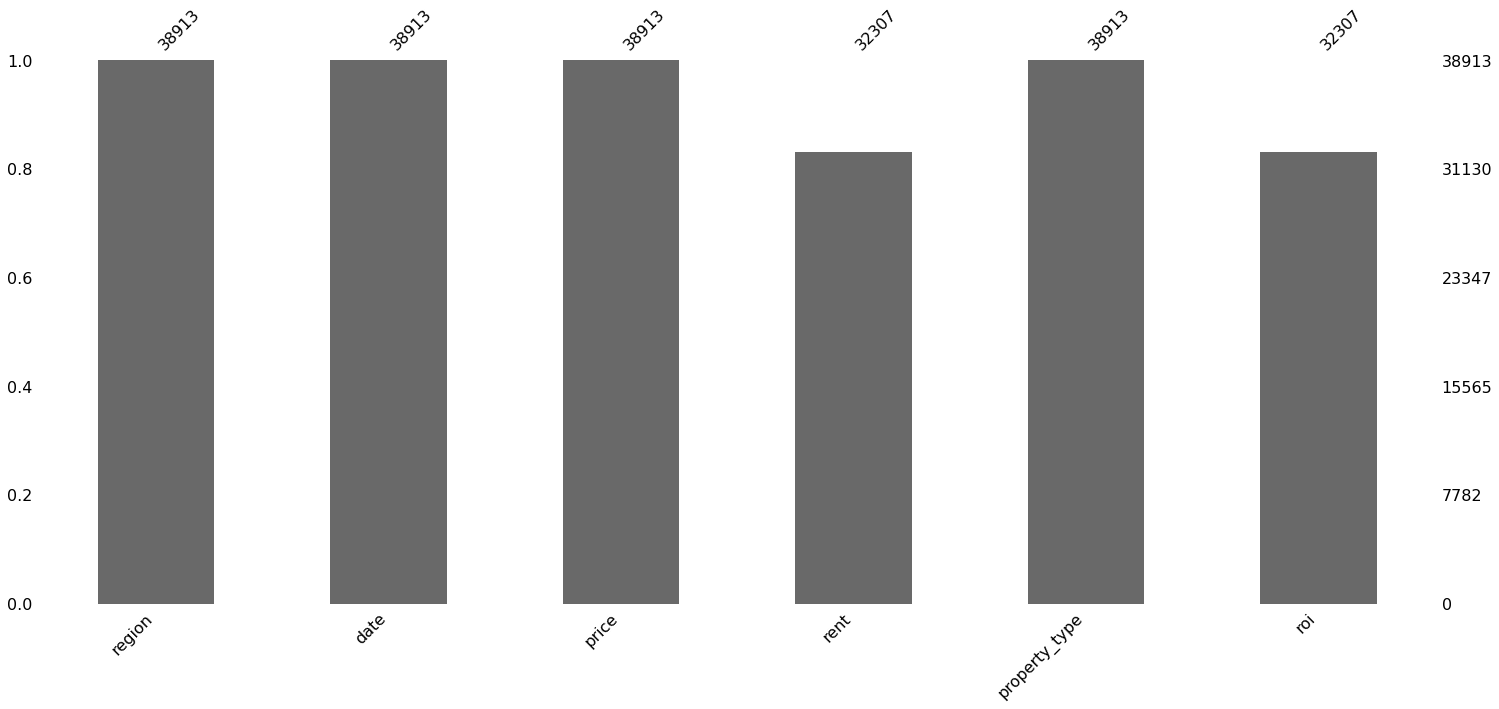

In [34]:
#evidenciamos datos faltantes
msno.bar(renta)
plt.show()

In [35]:
print('Porcentaje de valores faltantes de la variable rent:', (renta.rent.isnull().sum()/len(renta)) * 100)
print('Porcentaje de valores faltantes de la variable roi:', (renta.roi.isnull().sum()/len(renta)) * 100)

Porcentaje de valores faltantes de la variable rent: 16.97633181713052
Porcentaje de valores faltantes de la variable roi: 16.97633181713052


In [85]:
renta.shape

(32307, 6)

In [36]:
#eliminamos nulos
renta = renta.dropna() 

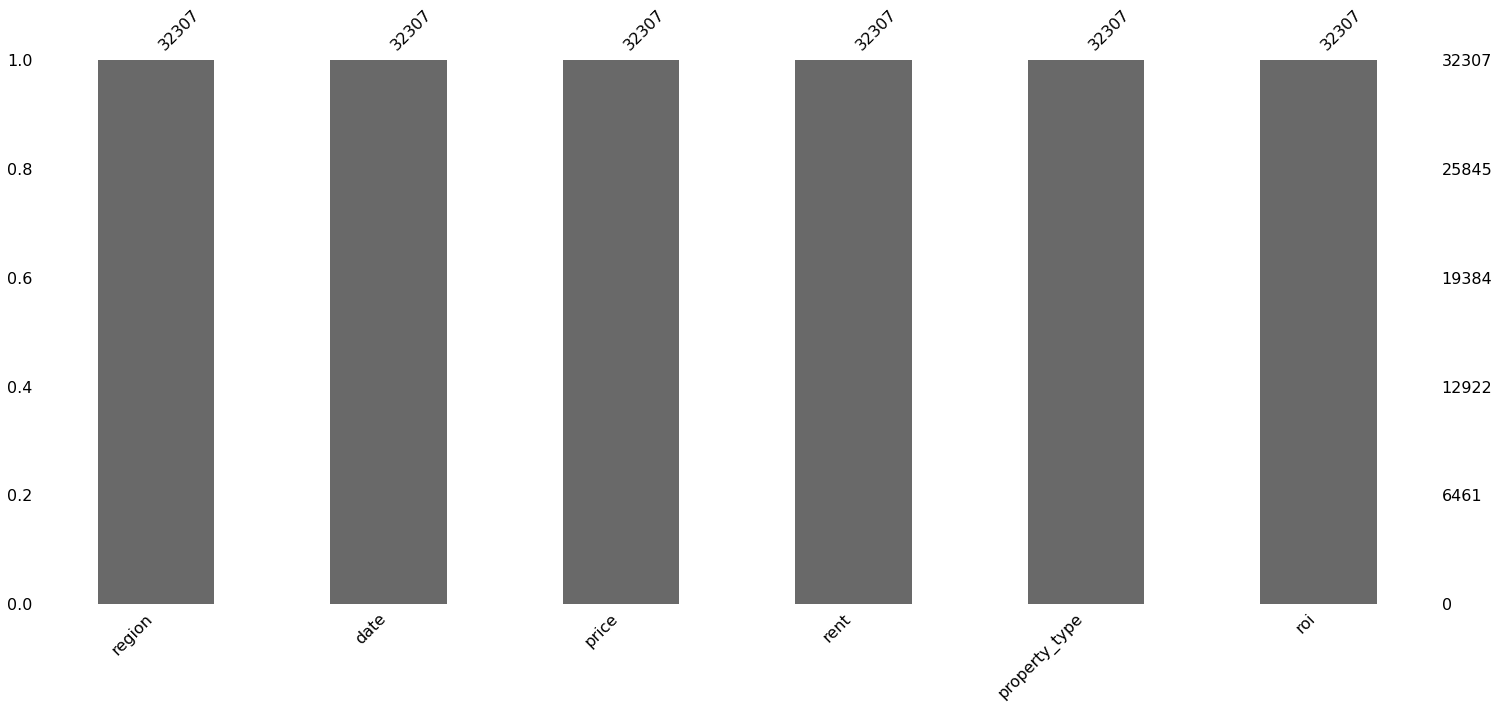

In [86]:
#evidenciamos datos faltantes
msno.bar(renta)
plt.show()

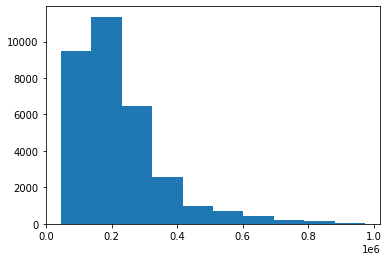

In [87]:
# Observamos cómo quedó la distribución

plt.hist(renta['price']) 
plt.show()

In [37]:
pib = pd.read_csv('PIB_Estados.csv')
pib

FileNotFoundError: [Errno 2] No such file or directory: 'PIB_Estados.csv'

In [103]:
#reemplazamos caracteres especiales 
pib['PIB anual']=pib['PIB anual'].str.replace('M€','')
pib['Var. PIB (%)'] = pib['Var. PIB (%)'].str.replace('%','')

In [104]:
pib

,Fecha,PIB anual,Var. PIB (%),Estado
0,2021,214.856,"5,1",alabama
1,2020,202.147,"-1,8",alabama
2,2019,206.844,"1,5",alabama
3,2018,189.551,"1,7",alabama
4,2017,189.968,"1,4",alabama
...,...,...,...,...
1145,2003,41.584,"0,3",virginia-occidental
1146,2002,48.203,"1,1",virginia-occidental
1147,2001,49.099,"-0,3",virginia-occidental
1148,2000,46.011,"-0,6",virginia-occidental


Hasta el momento hemos hecho el ETL y tenemos dos bases listas
- macroh = Housing macroeconomic factors
- macro = annual macroeconomic factors 
- renta = Info_propiedades_precio_renta_roi
- pib = PIB_estados
les colocamos la abreviacion a todas las bases para relacionarlas despues exceptuando las que estan a nivel general como las macro
renta
pib

In [126]:
pib['Estado'].unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'carolina del norte', 'carolina del sur', 'colorado',
       'connecticut', 'dakota del norte', 'dakota del sur', 'delaware',
       'florida', 'georgia', 'hawai', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'luisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'misisipi', 'misuri',
       'montana', 'nebraska', 'nevada', 'nueva jersey', 'nueva york',
       'nuevo hampshire', 'nuevo mexico', 'ohio', 'oklahoma', 'oregon',
       'pensilvania', 'rhode island', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'wisconsin', 'wyoming',
       'virginia-occidental'], dtype=object)

In [127]:
pib['id_Estado'] = pib['Estado']
pib['id_Estado'] = pib['id_Estado'].map({'california':'CA','texas':'TX','nueva york':'NY','florida':'FL',
'illinois':'IL','pennsylvania':'PA','ohio':'OH','michigan':'MI','georgia':'GA','carolina del norte':'NC','nueva jersey':'NJ',
'virginia':'VA','washington':'WA','massachusetts':'MA','indiana':'IN','arizona':'AZ','tennessee':'TN','misuri':'MO',
'maryland':'MD','wisconsin':'WI','minnesota':'MN','colorado':'CO','alabama':'AL','carolina del sur':'SC','luisiana':'LA',
'kentucky':'KY','oregon':'OR','oklahoma':'OK','connecticut':'CT','iowa':'IA','misisipi':'MS','arkansas':'AR','kansas':'KS',
'utah':'UT','nevada':'NV','new Mexico':'NM','virginia-occidental':'WV','nebraska':'NE','idaho':'ID','hawai':'HI','maine':'ME',
'nuevo hampshire':'NH','rhode island':'RI','montana':'MT','delaware':'DE','dakota del sur':'SD','alaska':'AK','dakota del norte':'ND',
'vermont':'VT','wyoming':'WT'}, na_action =None)

In [123]:
renta['Id_estado'] = renta['region']
renta['Id_estado'] = renta['Id_estado'].map({'California':'CA','Texas':'TX','New York':'NY','Florida':'FL',
'Illinois':'IL','Pennsylvania':'PA','Ohio':'OH','Michigan':'MI','Georgia':'GA','North Carolina':'NC','New Jersey':'NJ',
'Virginia':'VA','Washington':'WA','Massachusetts':'MA','Indiana':'IN','Arizona':'AZ','Tennessee':'TN','Missouri':'MO',
'Maryland':'MD','Wisconsin':'WI','Minnesota':'MN','Colorado':'CO','Alabama':'AL','South Carolina':'SC','Louisiana':'LA',
'Kentucky':'KY','Oregon':'OR','Oklahoma':'OK','Connecticut':'CT','Iowa':'IA','Mississippi':'MS','Arkansas':'AR','Kansas':'KS',
'Utah':'UT','Nevada':'NV','New Mexico':'NM','West Virginia':'WV','Nebraska':'NE','Idaho':'ID','Hawaii':'HI','Maine':'ME',
'New Hampshire':'NH','Rhode Island':'RI','Montana':'MT','Delaware':'DE','South Dakota':'SD','Alaska':'AK','North Dakota':'ND',
'Vermont':'VT','Wyoming':'WT'}, na_action =None)

C:\Users\andrea\AppData\Local\Temp\ipykernel_3952\1042340557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renta['Id_estado'] = renta['region']
C:\Users\andrea\AppData\Local\Temp\ipykernel_3952\1042340557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renta['Id_estado'] = renta['Id_estado'].map({'California':'CA','Texas':'TX','New York':'NY','Florida':'FL',


In [128]:
pib

,Fecha,PIB anual,Var. PIB (%),Estado,id_Estado
0,2021,214.856,"5,1",alabama,AL
1,2020,202.147,"-1,8",alabama,AL
2,2019,206.844,"1,5",alabama,AL
3,2018,189.551,"1,7",alabama,AL
4,2017,189.968,"1,4",alabama,AL
...,...,...,...,...,...
1145,2003,41.584,"0,3",virginia-occidental,WV
1146,2002,48.203,"1,1",virginia-occidental,WV
1147,2001,49.099,"-0,3",virginia-occidental,WV
1148,2000,46.011,"-0,6",virginia-occidental,WV


In [2]:
#Eliminamos caracteres especiales y agregamos abreviacion
pobre = pd.read_csv('pobreza_estados.csv')
pobre

NameError: name 'pd' is not defined

In [135]:
#reemplazamos caracteres especiales 
pobre['Personas en riesgo de pobreza']= pobre['Personas en riesgo de pobreza'].str.replace('k','')
pobre['% Riesgo Pobreza'] = pobre['% Riesgo Pobreza'].str.replace('%','')

In [137]:
#agregamos abreviacion
pobre['id_Estado'] = pobre['Estado']
pobre['id_Estado'] = pobre['id_Estado'].map({'california':'CA','texas':'TX','nueva york':'NY','florida':'FL',
'illinois':'IL','pennsylvania':'PA','ohio':'OH','michigan':'MI','georgia':'GA','carolina del norte':'NC','nueva jersey':'NJ',
'virginia':'VA','washington':'WA','massachusetts':'MA','indiana':'IN','arizona':'AZ','tennessee':'TN','misuri':'MO',
'maryland':'MD','wisconsin':'WI','minnesota':'MN','colorado':'CO','alabama':'AL','carolina del sur':'SC','luisiana':'LA',
'kentucky':'KY','oregon':'OR','oklahoma':'OK','connecticut':'CT','iowa':'IA','misisipi':'MS','arkansas':'AR','kansas':'KS',
'utah':'UT','nevada':'NV','new Mexico':'NM','virginia-occidental':'WV','nebraska':'NE','idaho':'ID','hawai':'HI','maine':'ME',
'nuevo hampshire':'NH','rhode island':'RI','montana':'MT','delaware':'DE','dakota del sur':'SD','alaska':'AK','dakota del norte':'ND',
'vermont':'VT','wyoming':'WT'}, na_action =None)

In [138]:
pobre

,Fecha,Personas en riesgo de pobreza,% Riesgo Pobreza,Estado,id_Estado
0,2020,727,"14,9",alabama,AL
1,2019,627,"12,9",alabama,AL
2,2018,779,"16,0",alabama,AL
3,2017,735,"15,3",alabama,AL
4,2016,782,"16,2",alabama,AL
...,...,...,...,...,...
2045,1984,392,"20,4",virginia-occidental,WV
2046,1983,419,"22,1",virginia-occidental,WV
2047,1982,484,"24,8",virginia-occidental,WV
2048,1981,398,"19,9",virginia-occidental,WV


Hasta el momento hemos hecho el ETL y tenemos dos bases listas
- macroh = Housing macroeconomic factors
- macro = annual macroeconomic factors 
- renta = Info_propiedades_precio_renta_roi
- pib = PIB_estados
- pobre = pobreza estados
- TD = Tasa desempleo
les colocamos la abreviacion a todas las bases para relacionarlas despues exceptuando las que estan a nivel general como las macro
renta
pib
pobre 
TD

In [139]:
#eliminamos duplicados
pobre[pobre.duplicated()]
pobre.drop_duplicates(inplace = True)

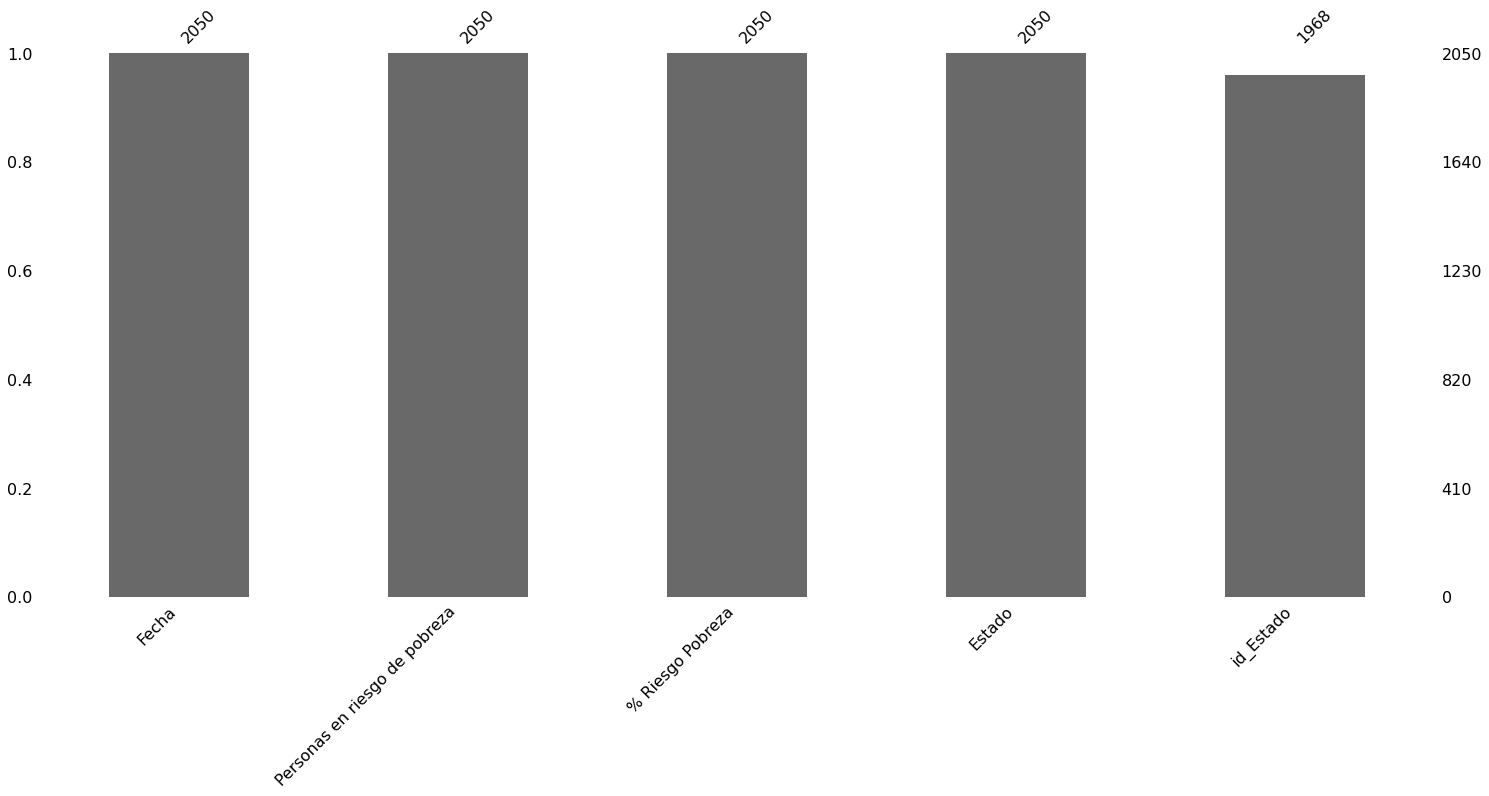

In [140]:
#evidenciamos datos faltantes
msno.bar(pobre)
plt.show()

In [141]:
td = pd.read_csv('Tasa_desempleo2000_2010.csv')
td

,Estado,Año,Mes,Tasa de desempleo
0,Alaska,2000,Diciembre,6.3
1,Alaska,2000,Noviembre,6.3
2,Alaska,2000,Octubre,6.4
3,Alaska,2000,Septiembre,6.4
4,Alaska,2000,Agosto,6.4
...,...,...,...,...
6595,Wyoming,2010,Mayo,7.0
6596,Wyoming,2010,Abril,7.2
6597,Wyoming,2010,Marzo,7.5
6598,Wyoming,2010,Febrero,7.6


In [143]:
#Primero creamos la columna y la rellenamos con los mismos valores de la columna estado
td['Id_estado'] = td['Estado']
#luego aplicamos la conversion de la columna creada
td['Id_estado'] = td['Id_estado'].map({'California':'CA','Texas':'TX','New York':'NY','Florida':'FL',
'Illinois':'IL','Pennsylvania':'PA','Ohio':'OH','Michigan':'MI','Georgia':'GA','North Carolina':'NC','New Jersey':'NJ',
'Virginia':'VA','Washington':'WA','Massachusetts':'MA','Indiana':'IN','Arizona':'AZ','Tennessee':'TN','Missouri':'MO',
'Maryland':'MD','Wisconsin':'WI','Minnesota':'MN','Colorado':'CO','Alabama':'AL','South Carolina':'SC','Louisiana':'LA',
'Kentucky':'KY','Oregon':'OR','Oklahoma':'OK','Connecticut':'CT','Iowa':'IA','Mississippi':'MS','Arkansas':'AR','Kansas':'KS',
'Utah':'UT','Nevada':'NV','New Mexico':'NM','West Virginia':'WV','Nebraska':'NE','Idaho':'ID','Hawaii':'HI','Maine':'ME',
'New Hampshire':'NH','Rhode Island':'RI','Montana':'MT','Delaware':'DE','South Dakota':'SD','Alaska':'AK','North Dakota':'ND',
'Vermont':'VT','Wyoming':'WT'}, na_action =None)

In [144]:
td

,Estado,Año,Mes,Tasa de desempleo,Id_estado
0,Alaska,2000,Diciembre,6.3,AK
1,Alaska,2000,Noviembre,6.3,AK
2,Alaska,2000,Octubre,6.4,AK
3,Alaska,2000,Septiembre,6.4,AK
4,Alaska,2000,Agosto,6.4,AK
...,...,...,...,...,...
6595,Wyoming,2010,Mayo,7.0,WT
6596,Wyoming,2010,Abril,7.2,WT
6597,Wyoming,2010,Marzo,7.5,WT
6598,Wyoming,2010,Febrero,7.6,WT


vamos a cambiar los nombres de los estados para que queden iguales en las 4 bases por estados
pobre y pib

In [145]:
pib

,Fecha,PIB anual,Var. PIB (%),Estado,id_Estado
0,2021,214.856,"5,1",alabama,AL
1,2020,202.147,"-1,8",alabama,AL
2,2019,206.844,"1,5",alabama,AL
3,2018,189.551,"1,7",alabama,AL
4,2017,189.968,"1,4",alabama,AL
...,...,...,...,...,...
1145,2003,41.584,"0,3",virginia-occidental,WV
1146,2002,48.203,"1,1",virginia-occidental,WV
1147,2001,49.099,"-0,3",virginia-occidental,WV
1148,2000,46.011,"-0,6",virginia-occidental,WV


In [146]:
pib['Estado'].unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'carolina del norte', 'carolina del sur', 'colorado',
       'connecticut', 'dakota del norte', 'dakota del sur', 'delaware',
       'florida', 'georgia', 'hawai', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'luisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'misisipi', 'misuri',
       'montana', 'nebraska', 'nevada', 'nueva jersey', 'nueva york',
       'nuevo hampshire', 'nuevo mexico', 'ohio', 'oklahoma', 'oregon',
       'pensilvania', 'rhode island', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'wisconsin', 'wyoming',
       'virginia-occidental'], dtype=object)

In [147]:
pib['Estado'] = pib['Estado'].map({'california':'California','texas':'Texas','nueva york':'New York','florida':'Florida',
'illinois':'Illinois','pennsylvania':'Pennsylvania','ohio':'Ohio','michigan':'Michigan','georgia':'Georgia','carolina del norte':'North Carolina','nueva jersey':'New Jersey',
'virginia':'Virginia','washington':'Washington','massachusetts':'Massachusetts','indiana':'Indiana','arizona':'Arizona','tennessee':'Tennessee','misuri':'Missouri',
'maryland':'Maryland','wisconsin':'Wisconsin','minnesota':'Minnesota','colorado':'Colorado','alabama':'Alabama','carolina del sur':'South Carolina','luisiana':'Louisiana',
'kentucky':'Kentucky','oregon':'Oregon','oklahoma':'Oklahoma','connecticut':'Connecticut','iowa':'Iowa','misisipi':'Mississippi','arkansas':'Arkansas','kansas':'Kansas',
'utah':'Utah','nevada':'Nevada','nuevo mexico':'New Mexico','virginia-occidental':'West Virginia','nebraska':'Nebraska','idaho':'Idaho','hawai':'Hawaii','maine':'Maine',
'nuevo hampshire':'New Hampshire','rhode island':'Rhode Island','montana':'Montana','delaware':'Delaware','dakota del sur':'South Dakota','alaska':'Alaska','dakota del norte':'North Dakota',
'vermont':'Vermont','wyoming':'Wyoming'}, na_action =None)

In [148]:
pib

,Fecha,PIB anual,Var. PIB (%),Estado,id_Estado
0,2021,214.856,"5,1",Alabama,AL
1,2020,202.147,"-1,8",Alabama,AL
2,2019,206.844,"1,5",Alabama,AL
3,2018,189.551,"1,7",Alabama,AL
4,2017,189.968,"1,4",Alabama,AL
...,...,...,...,...,...
1145,2003,41.584,"0,3",West Virginia,WV
1146,2002,48.203,"1,1",West Virginia,WV
1147,2001,49.099,"-0,3",West Virginia,WV
1148,2000,46.011,"-0,6",West Virginia,WV


In [149]:
pobre['Estado'] = pobre['Estado'].map({'california':'California','texas':'Texas','nueva york':'New York','florida':'Florida',
'illinois':'Illinois','pennsylvania':'Pennsylvania','ohio':'Ohio','michigan':'Michigan','georgia':'Georgia','carolina del norte':'North Carolina','nueva jersey':'New Jersey',
'virginia':'Virginia','washington':'Washington','massachusetts':'Massachusetts','indiana':'Indiana','arizona':'Arizona','tennessee':'Tennessee','misuri':'Missouri',
'maryland':'Maryland','wisconsin':'Wisconsin','minnesota':'Minnesota','colorado':'Colorado','alabama':'Alabama','carolina del sur':'South Carolina','luisiana':'Louisiana',
'kentucky':'Kentucky','oregon':'Oregon','oklahoma':'Oklahoma','connecticut':'Connecticut','iowa':'Iowa','misisipi':'Mississippi','arkansas':'Arkansas','kansas':'Kansas',
'utah':'Utah','nevada':'Nevada','nuevo mexico':'New Mexico','virginia-occidental':'West Virginia','nebraska':'Nebraska','idaho':'Idaho','hawai':'Hawaii','maine':'Maine',
'nuevo hampshire':'New Hampshire','rhode island':'Rhode Island','montana':'Montana','delaware':'Delaware','dakota del sur':'South Dakota','alaska':'Alaska','dakota del norte':'North Dakota',
'vermont':'Vermont','wyoming':'Wyoming'}, na_action =None)

In [150]:
pobre

,Fecha,Personas en riesgo de pobreza,% Riesgo Pobreza,Estado,id_Estado
0,2020,727,"14,9",Alabama,AL
1,2019,627,"12,9",Alabama,AL
2,2018,779,"16,0",Alabama,AL
3,2017,735,"15,3",Alabama,AL
4,2016,782,"16,2",Alabama,AL
...,...,...,...,...,...
2045,1984,392,"20,4",West Virginia,WV
2046,1983,419,"22,1",West Virginia,WV
2047,1982,484,"24,8",West Virginia,WV
2048,1981,398,"19,9",West Virginia,WV


hacemos cambios para importacion a mysql como formato, orden de columnas y tipo de dato

In [152]:
pobre = pobre[['id_Estado','Estado','Fecha','Personas en riesgo de pobreza','% Riesgo Pobreza']]

In [171]:
pobre['% Riesgo Pobreza']= pobre['% Riesgo Pobreza'].replace('14,9','14.9')
pobre['% Riesgo Pobreza']= pobre['% Riesgo Pobreza'].replace('12,9','12.9')
pobre['% Riesgo Pobreza']= pobre['% Riesgo Pobreza'].replace('16,0','16.0')
pobre['% Riesgo Pobreza']= pobre['% Riesgo Pobreza'].str.replace(',','.')

In [172]:
pobre['Personas en riesgo de pobreza']= pobre['Personas en riesgo de pobreza'].astype(float)
pobre['% Riesgo Pobreza']= pobre['% Riesgo Pobreza'].astype(float)


Hasta el momento hemos hecho el ETL y tenemos dos bases listas
- macroh = Housing macroeconomic factors
- macro = annual macroeconomic factors 
- renta = Info_propiedades_precio_renta_roi
- pib = PIB_estados
- pobre = pobreza estados
- TD = Tasa desempleo
les colocamos la abreviacion a todas las bases para relacionarlas despues exceptuando las que estan a nivel general como las macro
renta
pib
pobre 
TD

In [1]:
#Exportamos a csv
macroh.to_csv('Housing_macroeconomic_factors_EDA.csv',sep=",",index = None)
macro.to_csv('annual_macroeconomic_factors_EDA.csv',sep=",",index = None)
pib.to_csv('PIB_estados_EDA.csv',sep=",",index = None)
renta.to_csv('Info_propiedades_precio_renta_roi_EDA.csv',sep=",",index = None)
pobre.to_csv('pobreza_estados_EDA.csv',sep=",",index = None)
td.to_csv('Tasa_desempleo_EDA.csv',sep=",",index = None)

NameError: name 'macroh' is not defined

Quedamos listos para analizar y enviar a datawarehouse

In [157]:
pobre

,id_Estado,Estado,Fecha,Personas en riesgo de pobreza,% Riesgo Pobreza
0,AL,Alabama,2020,727,"14,9"
1,AL,Alabama,2019,627,"12,9"
2,AL,Alabama,2018,779,"16,0"
3,AL,Alabama,2017,735,"15,3"
4,AL,Alabama,2016,782,"16,2"
...,...,...,...,...,...
2045,WV,West Virginia,1984,392,"20,4"
2046,WV,West Virginia,1983,419,"22,1"
2047,WV,West Virginia,1982,484,"24,8"
2048,WV,West Virginia,1981,398,"19,9"


In [181]:
#SACAMOS NULOS ya que estan vacios 4 columnas y es bastante
macroh = macroh.dropna()

In [189]:
pib

,id_Estado,Fecha,PIB anual,Var. PIB (%),Estado
0,AL,2021,214.856,5.1,Alabama
1,AL,2020,202.147,-1.8,Alabama
2,AL,2019,206.844,1.5,Alabama
3,AL,2018,189.551,1.7,Alabama
4,AL,2017,189.968,1.4,Alabama
...,...,...,...,...,...
1145,WV,2003,41.584,0.3,West Virginia
1146,WV,2002,48.203,1.1,West Virginia
1147,WV,2001,49.099,-0.3,West Virginia
1148,WV,2000,46.011,-0.6,West Virginia


In [188]:
pib['Var. PIB (%)'] = pib['Var. PIB (%)'].str.replace(',','.')
pib = pib[['id_Estado','Fecha','PIB anual','Var. PIB (%)','Estado']]
pib['Var. PIB (%)']= pib['Var. PIB (%)'].astype(float)

In [193]:
td = td[['Id_estado','Año','Mes','Tasa de desempleo','Estado']]

In [194]:
td

,Id_estado,Año,Mes,Tasa de desempleo,Estado
0,AK,2000,Diciembre,6.3,Alaska
1,AK,2000,Noviembre,6.3,Alaska
2,AK,2000,Octubre,6.4,Alaska
3,AK,2000,Septiembre,6.4,Alaska
4,AK,2000,Agosto,6.4,Alaska
...,...,...,...,...,...
6595,WT,2010,Mayo,7.0,Wyoming
6596,WT,2010,Abril,7.2,Wyoming
6597,WT,2010,Marzo,7.5,Wyoming
6598,WT,2010,Febrero,7.6,Wyoming
